In [3]:
import pandas as pd
import numpy as np
from pathlib import Path

def read_result(path:Path):
    df = pd.read_json(path).T
    df.columns = [' '.join((path.stem, item)) for item in df.columns]
    return df

dfs = map(read_result, Path('result').glob('*.json'))
df = pd.concat(dfs, axis=1).applymap(np.median)
df.reset_index(inplace=True)

In [4]:
df

,index,vertica write,vertica read,clickhouse_basic write,clickhouse_basic read,clickhouse_cluster write,clickhouse_cluster read
0,1000,0.099830,0.006710,0.014729,0.003680,0.031998,0.007005
1,10000,0.895903,0.013216,0.137642,0.012050,0.295800,0.017329
2,100000,9.935396,0.036578,1.324422,0.074036,2.972516,0.125345
3,1000000,94.446192,0.309041,12.650372,0.769765,30.693453,1.028514
4,10000000,944.613881,1.142637,130.544455,13.292460,318.148360,12.222944


In [5]:
df.columns = ['count'] + list(df.columns[1:])
df = df.melt('count', var_name='type', value_name='elapsed')

<Axes: xlabel='count', ylabel='elapsed'>

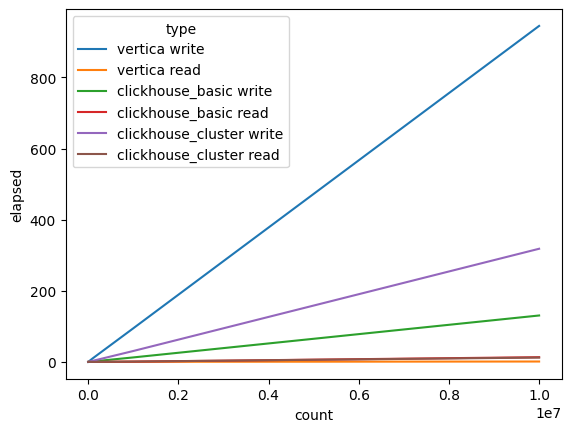

In [6]:
import seaborn as sns

sns.lineplot(df, x='count', y='elapsed', hue='type')